In [54]:
#Importing needed packages
import pandas as pd
import os
import requests
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from pandas.plotting import scatter_matrix



In [10]:
#loading the CSV file
movies=pd.read_csv(r"/Users/moussaberete/Desktop/GT-ATL-DATA-PT-12-2019-U-C/Project1/Resources/MovieData_Clean.csv")


In [4]:
#Initial look on the data
movies.head()


,Unnamed: 0,TMDB ID,Title,Release Date,Budget,Revenue,IMDB ID,Rating,Runtime,Genre,...,Country,Awards,Poster,IMDB Rating,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release,Year of Release
0,4827,110681,Kings of the Evening,2008-01-01,0.0,98682.0,tt1006904,PG,99 min,Drama,...,USA,8 wins & 1 nomination.,https://m.media-amazon.com/images/M/MV5BMjA3OT...,6.0,234,01 Nov 2010,Indican Pictures,Tuesday,January,2008
1,4352,26163,The Decline And Fall Of America,2008-01-01,7500.0,1200.0,tt1786696,NaN,120 min,Documentary,...,USA,NaN,https://m.media-amazon.com/images/M/MV5BMTMzNj...,5.2,13,NaN,NaN,Tuesday,January,2008
2,4111,13971,Wild Child,2008-01-01,20000000.0,21972336.0,tt1024255,PG-13,124 min,"Comedy, Drama, Romance",...,"USA, UK, France",NaN,https://m.media-amazon.com/images/M/MV5BNzUzYT...,6.1,"46,716",17 Nov 2009,Universal Pictures,Tuesday,January,2008
3,4009,6933,One Missed Call,2008-01-04,27.0,26.0,tt0479968,PG-13,87 min,"Horror, Mystery",...,"USA, Japan, Germany, UK",2 nominations.,https://m.media-amazon.com/images/M/MV5BMjA2NT...,4.0,"30,026",22 Apr 2008,Warner Bros. Pictures,Friday,January,2008
4,3969,14423,First Sunday,2008-01-11,0.0,38804615.0,tt0486578,PG-13,96 min,"Comedy, Crime, Drama",...,USA,NaN,https://m.media-amazon.com/images/M/MV5BMjE4MT...,4.5,"9,203",13 May 2008,NaN,Friday,January,2008


In [5]:
*Descriptive analysis
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 25 columns):
Unnamed: 0          3320 non-null int64
TMDB ID             3320 non-null int64
Title               3320 non-null object
Release Date        3320 non-null object
Budget              3319 non-null float64
Revenue             3319 non-null float64
IMDB ID             3320 non-null object
Rating              3128 non-null object
Runtime             3298 non-null object
Genre               3317 non-null object
Director            3313 non-null object
Writer              3222 non-null object
Actors              3301 non-null object
Plot                3295 non-null object
Language            3309 non-null object
Country             3318 non-null object
Awards              2799 non-null object
Poster              3286 non-null object
IMDB Rating         3286 non-null float64
IMDB Votes          3286 non-null object
DVD Release Date    2848 non-null object
Production          3035 non-nu

In [7]:
movies.describe()

,Unnamed: 0,TMDB ID,Budget,Revenue,IMDB Rating,Year of Release
count,3320.000000,3320.000000,3.319000e+03,3.319000e+03,3286.000000,3320.000000
mean,26702.502108,191098.724699,2.867352e+07,9.191281e+07,6.432562,2013.243072
std,14690.858568,157500.257667,4.699548e+07,2.055842e+08,1.007040,3.226269
min,65.000000,155.000000,0.000000e+00,1.000000e+00,1.400000,2008.000000
25%,13160.750000,48500.000000,0.000000e+00,1.037036e+06,5.800000,2011.000000
50%,27484.500000,148052.000000,1.000000e+07,1.540000e+07,6.500000,2013.000000
75%,40814.500000,321935.000000,3.500000e+07,8.460386e+07,7.100000,2016.000000
max,48552.000000,664389.000000,3.800000e+08,2.797801e+09,9.000000,2020.000000


In [8]:
movies.describe(include=['object'])

,Title,Release Date,IMDB ID,Rating,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,IMDB Votes,DVD Release Date,Production,Day of Release,Month of Release
count,3320,3320,3320,3128,3298,3317,3313,3222,3301,3295,3309,3318,2799,3286,3286,2848,3035,3320,3320
unique,3291,1295,3289,19,147,755,2119,2978,3250,3264,609,602,994,3256,3177,861,686,7,12
top,To Die is Hard,2010-01-01,tt1144551,R,90 min,Drama,Tyler Perry,Woody Allen,"Adam Sandler, Andy Samberg, Selena Gomez, Kevi...","In 12th century England, Robin and his band of...",English,USA,1 nomination.,https://m.media-amazon.com/images/M/MV5BMzE5MD...,14,09 Feb 2010,Warner Bros. Pictures,Friday,October
freq,2,10,2,1331,120,172,11,9,3,2,1807,1599,251,2,4,13,169,2389,339


In [ ]:
#The clean data has 3320 records with 25 variables
#There are 6 numeric and 19 non-numeric variables
#The data inclued 3291 unique Movie Titles released from 2008 to 2020 in 602 countries and 609 languages
#The budget for these movies ranged from $0 to $380 Million with revenue ranging from $1 to $2.8 Billion
#755 different movie genres, 2119 movie Directors, 2978 writers and 3250 actors are represented in the data
#The IMDB rating ranged from 1.4 to 9

#Based on the initial analysis, it will be intesrting to analyze the relationship betwen some variables and analyze factors that can predict IMDB Rating

In [51]:
# Testing the correlation between variables in the data to see if there are relationships

## Questions 1: Do movies with higher budget generate more revenue?
   #H01: There is no significant relationship between movie budget and revenue
  #Ha1: There is a signification relationship between movie budget and revenue

##Question 2: Will higher IMDB rating affect movie revenue?
  #H02: There is no significant relationship between IMDB rating and movie revenue
  #Ha2: There is a significant relationship between IMDB rating and movie revenue

# In order to answer the abive two questions, I ran pearson correlation to test the hypotheses. 

movies_sub= pd.DataFrame(movies,columns=['Revenue','Budget','IMDB Rating'])

movies_sub.corr(method='pearson')


,Revenue,Budget,IMDB Rating
Revenue,1.000000,0.788899,0.182305
Budget,0.788899,1.000000,0.104006
IMDB Rating,0.182305,0.104006,1.000000


In [ ]:
## Question 1 Response: The correlaton between Budget and Revenue is positive and strong (r = +0.79)
   # Based on the correlation resul, H01 is rejected
   # This result indicates that there is a strong and positive relationship between budget and revenue
   # Movies with higher budget generate more revenue. However, this does not mean they make more profit. 
    
## Question 2 Response: The correlation between IMDB score and revenue is positve and low (r = +0.2)
  # Based on the corrlation result, H02 is accepted
  # This result indicates that the IMDB rating does have a significant impact on a movie's revenue
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c193aa650>,
      dtype=object)

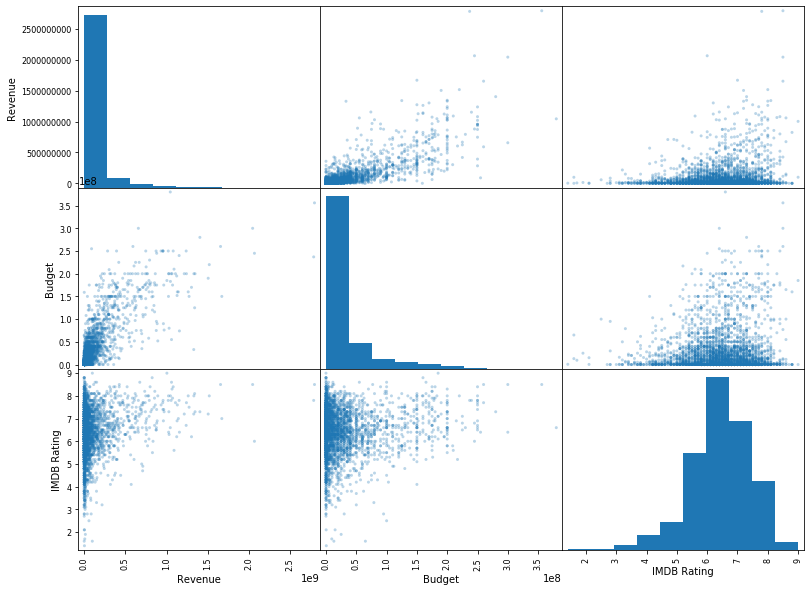

In [57]:
# Plotting the scatterplot matrix
scatter_matrix(movies_sub, figsize=(13,10), alpha=0.3)